<a href="https://colab.research.google.com/github/seyeon-shijuan/birth-rate-to-universities-visualization/blob/master/notebook/individual_notebooks/SeYoung_univ_pernum_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

표7) 지역별 2022년 대학 정원 및 총 정원 pandas dataframe 표
 


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
plt.rc('font', family='NanumBarunGothic')
df = pd.read_csv("https://raw.githubusercontent.com/seyeon-shijuan/birth-rate-to-universities-visualization/master/data/university_enrollment_2023.csv",encoding="cp949",thousands = ',' )


df

,기준연도,학교종류,설립구분,지역,상태,학교,입학정원(A),모집인원계,정원내(B),정원외,지원자계,정원내(C),정원외.1,입학자계,정원내(D)남,정원내(D)여,정원외남,정원외여,정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
0,2022,대학교,사립,경남,기존,가야대학교(김해),460,490,463,27,2286,2142,144,383,179,178,6,20,77.1,4.6
1,2022,대학교,사립,경기,기존,가천대학교,4081,4694,4083,611,66469,62951,3518,4675,2124,1959,312,280,100.0,15.4
2,2022,대학교,사립,강원,기존,가톨릭관동대학교,1824,1957,1825,132,7556,6926,630,1563,858,598,41,66,79.8,3.8
3,2022,대학교,사립,충북,기존,가톨릭꽃동네대학교,108,115,108,7,535,513,22,108,41,62,2,3,95.4,4.8
4,2022,대학교,사립,경기,기존,가톨릭대학교,1574,1792,1576,216,21304,20077,1227,1770,697,876,79,118,99.8,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2022,산업대학,사립,전북,기존,호원대학교,1132,1474,1095,379,11878,11125,753,1376,487,539,148,202,93.7,10.2
240,2022,대학교,사립,서울,기존,홍익대학교,2421,2879,2422,457,41971,39180,2791,2876,1314,1105,167,290,99.9,16.2
241,2022,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,1299,1412,1302,110,10593,10189,404,1383,644,653,44,42,99.6,7.8
242,2022,대학교,사립,경기,기존,화성의과학대학교,246,266,253,13,1127,1064,63,71,29,37,3,2,26.1,4.2


In [4]:
dfc=df.columns
dfc

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '입학정원(A)', '모집인원계', '정원내(B)',
       '정원외', '지원자계', '정원내(C)', '정원외.1', '입학자계', '정원내(D)남', '정원내(D)여', '정원외남',
       '정원외여', '정원내 신입생 충원율(%) (D/B) × 100', '경쟁률(C/B)'],
      dtype='object')

In [5]:
dfr=df[["지역","모집인원계","입학정원(A)","정원내(B)","지원자계","정원내(C)"]]

dfr

,지역,모집인원계,입학정원(A),정원내(B),지원자계,정원내(C)
0,경남,490,460,463,2286,2142
1,경기,4694,4081,4083,66469,62951
2,강원,1957,1824,1825,7556,6926
3,충북,115,108,108,535,513
4,경기,1792,1574,1576,21304,20077
...,...,...,...,...,...,...
239,전북,1474,1132,1095,11878,11125
240,서울,2879,2421,2422,41971,39180
241,세종,1412,1299,1302,10593,10189
242,경기,266,246,253,1127,1064


In [6]:
dfr["지역"].unique()

array(['경남', '경기', '강원', '충북', '서울', '충남', '대전', '대구', '부산', '경북', '인천',
       '세종', '광주', '전남', '전북', '울산', '제주'], dtype=object)

In [7]:
dfsum=dfr.groupby("지역").sum()

In [8]:
dfper=df[["지역","정원내 신입생 충원율(%) (D/B) × 100",'경쟁률(C/B)']]
dfper

,지역,정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
0,경남,77.1,4.6
1,경기,100.0,15.4
2,강원,79.8,3.8
3,충북,95.4,4.8
4,경기,99.8,12.7
...,...,...,...
239,전북,93.7,10.2
240,서울,99.9,16.2
241,세종,99.6,7.8
242,경기,26.1,4.2


In [9]:
dfmean=dfper.groupby("지역").mean()

In [10]:
dfcom=pd.merge(dfsum,dfmean,"inner","지역")

In [11]:
dfcom

,모집인원계,입학정원(A),정원내(B),지원자계,정원내(C),정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
지역,,,,,,,
강원,16809,15584,15552,95807,90628,91.591667,5.883333
경기,45253,38663,38699,427382,404386,90.737838,8.075676
경남,13429,12258,12298,69247,65640,82.530000,4.750000
경북,31267,26276,26219,139118,131402,86.694737,4.136842
광주,14971,13870,13906,87106,83040,99.118182,5.781818
대구,10886,9852,9861,93430,88025,100.000000,9.800000
대전,24494,19112,18871,129980,122892,90.092308,5.984615
부산,37078,30837,30867,220760,209989,91.706250,5.737500
서울,205944,151729,152002,1133691,1053344,91.917857,9.826786


 그래프8) 2022년 대학 정원 대비 신생아가 대학 진학 연령(20세)가 되었을 경우 예상 대학 충원율
> 고려해야할 사항: 사망률,예상 대학 모집정원, 재수 및 조기 진학의 경우? <진학률이 필요할까? 



In [12]:

df = pd.read_csv("https://raw.githubusercontent.com/seyeon-shijuan/birth-rate-to-universities-visualization/master/data/regeon_age_persnum.csv",encoding="cp949",thousands = ',' )


df

,시나리오별,시도별,인구종류별,항목,단위,1970 년,1971 년,1972 년,1973 년,1974 년,...,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년,Unnamed: 86
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,생산연령인구(천명): 계(15~64세),인구항목,NaN,17540.0,18064.0,18602.0,19177.0,19782.0,...,27610.0,27173.0,26736.0,26240.0,25749.0,25264.0,24839.0,24486.0,24189.0,NaN
1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,생산연령인구(천명): 15~24세,인구항목,NaN,5838.0,6141.0,6453.0,6740.0,7049.0,...,2823.0,2752.0,2720.0,2726.0,2760.0,2814.0,2887.0,2974.0,3063.0,NaN
2,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,생산연령인구(천명): 25~49세,인구항목,NaN,9179.0,9323.0,9516.0,9741.0,9975.0,...,14041.0,13685.0,13315.0,12923.0,12511.0,12106.0,11704.0,11327.0,10944.0,NaN
3,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,생산연령인구(천명): 50~64세,인구항목,NaN,2522.0,2600.0,2634.0,2695.0,2758.0,...,10747.0,10736.0,10701.0,10590.0,10479.0,10344.0,10248.0,10186.0,10183.0,NaN
4,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,- 구성비(%): 15~24세,인구항목,NaN,18.1,18.7,19.3,19.8,20.3,...,5.7,5.6,5.5,5.6,5.7,5.8,6.0,6.2,6.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,제주특별자치도,학령인구(천명): 대학교(18~21세),인구항목,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,17.0,16.0,17.0,17.0,18.0,19.0,19.0,20.0,NaN
500,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,제주특별자치도,청소년인구(천명): 9~24세,인구항목,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,76.0,76.0,77.0,78.0,78.0,79.0,80.0,81.0,NaN
501,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,제주특별자치도,- 구성비(%): 9~24세,인구항목,NaN,NaN,NaN,NaN,NaN,NaN,...,10.6,10.6,10.7,10.8,10.9,11.1,11.2,11.4,11.5,NaN
502,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,제주특별자치도,청년인구(천명): 19~34세,인구항목,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,87.0,84.0,82.0,79.0,77.0,75.0,74.0,72.0,NaN


In [13]:
df["인구종류별"].unique()

array(['생산연령인구(천명): 계(15~64세)', '생산연령인구(천명): 15~24세',
       '생산연령인구(천명): 25~49세', '생산연령인구(천명): 50~64세', '- 구성비(%): 15~24세',
       '- 구성비(%): 25~49세', '- 구성비(%): 50~64세', '고령인구(천명): 65세+',
       '고령인구(천명): 65-69세', '고령인구(천명): 70세+', '고령인구(천명): 75세+',
       '고령인구(천명): 80세+', '고령인구(천명): 85세+', '- 구성비(%): 65세+',
       '- 구성비(%): 65-69세', '- 구성비(%): 70세+', '- 구성비(%): 75세+',
       '- 구성비(%): 80세+', '- 구성비(%): 85세+', '학령인구(천명): 계(6~21세)',
       '학령인구(천명): 초등학교(6~11세)', '학령인구(천명): 중학교(12~14세)',
       '학령인구(천명): 고등학교(15~17세)', '학령인구(천명): 대학교(18~21세)',
       '청소년인구(천명): 9~24세', '- 구성비(%): 9~24세', '청년인구(천명): 19~34세',
       '- 구성비(%): 19~34세'], dtype=object)

In [14]:
dfs=df[df["인구종류별"]=="학령인구(천명): 대학교(18~21세)"].drop('Unnamed: 86',axis=1)

In [15]:
dfs=dfs.fillna(0)
dfs

,시나리오별,시도별,인구종류별,항목,단위,1970 년,1971 년,1972 년,1973 년,1974 년,...,2041 년,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년
23,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,전국,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,1102.0,1046.0,1011.0,1002.0,1020.0,1061.0,1111.0,1157.0,1199.0,1237.0
51,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,166.0,161.0,160.0,163.0,171.0,180.0,188.0,196.0,203.0
79,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,부산광역시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,57.0,55.0,54.0,54.0,56.0,58.0,60.0,62.0,64.0
107,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,대구광역시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,43.0,42.0,41.0,41.0,43.0,45.0,46.0,48.0,49.0
135,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,인천광역시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,60.0,58.0,58.0,59.0,61.0,64.0,67.0,69.0,71.0
163,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,광주광역시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,32.0,31.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0
191,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,대전광역시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,31.0,30.0,29.0,30.0,31.0,33.0,34.0,35.0,36.0
219,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,울산광역시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,20.0,19.0,19.0,19.0,19.0,20.0,20.0,21.0,21.0
247,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,세종특별자치시,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,18.0,18.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
275,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,경기도,학령인구(천명): 대학교(18~21세),인구항목,0.0,0.0,0.0,0.0,0.0,0.0,...,332.0,316.0,306.0,305.0,312.0,327.0,345.0,362.0,377.0,391.0


In [16]:
dfs.columns

Index(['시나리오별', '시도별', '인구종류별', '항목', '단위', '1970 년', '1971 년', '1972 년',
       '1973 년', '1974 년', '1975 년', '1976 년', '1977 년', '1978 년', '1979 년',
       '1980 년', '1981 년', '1982 년', '1983 년', '1984 년', '1985 년', '1986 년',
       '1987 년', '1988 년', '1989 년', '1990 년', '1991 년', '1992 년', '1993 년',
       '1994 년', '1995 년', '1996 년', '1997 년', '1998 년', '1999 년', '2000 년',
       '2001 년', '2002 년', '2003 년', '2004 년', '2005 년', '2006 년', '2007 년',
       '2008 년', '2009 년', '2010 년', '2011 년', '2012 년', '2013 년', '2014 년',
       '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년',
       '2022 년', '2023 년', '2024 년', '2025 년', '2026 년', '2027 년', '2028 년',
       '2029 년', '2030 년', '2031 년', '2032 년', '2033 년', '2034 년', '2035 년',
       '2036 년', '2037 년', '2038 년', '2039 년', '2040 년', '2041 년', '2042 년',
       '2043 년', '2044 년', '2045 년', '2046 년', '2047 년', '2048 년', '2049 년',
       '2050 년'],
      dtype='object')

In [33]:
dfcs= dfs[['시도별',
       '2001 년', '2002 년', '2003 년', '2004 년', '2005 년', '2006 년', '2007 년',
       '2008 년', '2009 년', '2010 년', '2011 년', '2012 년', '2013 년', '2014 년',
       '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년',
       '2022 년', '2023 년', '2024 년', '2025 년', '2026 년', '2027 년', '2028 년',
       '2029 년', '2030 년', '2031 년', '2032 년', '2033 년', '2034 년', '2035 년',
       '2036 년', '2037 년', '2038 년', '2039 년', '2040 년', '2041 년', '2042 년',
       '2043 년', '2044 년', '2045 년', '2046 년', '2047 년', '2048 년', '2049 년',
       '2050 년']]

In [34]:
dfccs=dfcs*1000
dfccs["시도별"]=dfcs["시도별"]
dfccs=dfccs[1:]
dfccs

,시도별,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,...,2041 년,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년
51,서울특별시,739000.0,700000.0,664000.0,616000.0,566000.0,535000.0,520000.0,515000.0,522000.0,...,176000.0,166000.0,161000.0,160000.0,163000.0,171000.0,180000.0,188000.0,196000.0,203000.0
79,부산광역시,285000.0,271000.0,249000.0,227000.0,209000.0,195000.0,189000.0,187000.0,188000.0,...,61000.0,57000.0,55000.0,54000.0,54000.0,56000.0,58000.0,60000.0,62000.0,64000.0
107,대구광역시,186000.0,178000.0,166000.0,153000.0,142000.0,135000.0,134000.0,135000.0,137000.0,...,46000.0,43000.0,42000.0,41000.0,41000.0,43000.0,45000.0,46000.0,48000.0,49000.0
135,인천광역시,168000.0,166000.0,157000.0,148000.0,139000.0,137000.0,138000.0,140000.0,142000.0,...,63000.0,60000.0,58000.0,58000.0,59000.0,61000.0,64000.0,67000.0,69000.0,71000.0
163,광주광역시,112000.0,110000.0,105000.0,99000.0,93000.0,86000.0,83000.0,83000.0,86000.0,...,34000.0,32000.0,31000.0,30000.0,31000.0,32000.0,33000.0,34000.0,35000.0,36000.0
191,대전광역시,109000.0,106000.0,102000.0,99000.0,95000.0,90000.0,89000.0,89000.0,94000.0,...,32000.0,31000.0,30000.0,29000.0,30000.0,31000.0,33000.0,34000.0,35000.0,36000.0
219,울산광역시,69000.0,66000.0,61000.0,55000.0,51000.0,51000.0,52000.0,53000.0,53000.0,...,21000.0,20000.0,19000.0,19000.0,19000.0,19000.0,20000.0,20000.0,21000.0,21000.0
247,세종특별자치시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19000.0,18000.0,18000.0,18000.0,19000.0,20000.0,21000.0,22000.0,23000.0,24000.0
275,경기도,581000.0,583000.0,566000.0,545000.0,527000.0,524000.0,529000.0,541000.0,560000.0,...,332000.0,316000.0,306000.0,305000.0,312000.0,327000.0,345000.0,362000.0,377000.0,391000.0
303,강원도,102000.0,99000.0,92000.0,87000.0,82000.0,77000.0,75000.0,75000.0,78000.0,...,32000.0,30000.0,29000.0,28000.0,29000.0,30000.0,31000.0,33000.0,34000.0,35000.0


In [35]:
dfmcs=dfccs.groupby("시도별").mean()

In [36]:
dfmcs["시도별"]=['강원', '경기','경남', '경북', '광주', '대구', '대전', '부산', '서울','세종','울산', '인천', '전남', '전북',  '제주', '충남','충북']
       

In [37]:
dfmcs.index=dfmcs["시도별"]
dfmcs=dfmcs.drop("시도별",axis=1)

In [38]:
dfmcs

,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,2010 년,...,2041 년,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년
시도별,,,,,,,,,,,,,,,,,,,,,
강원,102000.0,99000.0,92000.0,87000.0,82000.0,77000.0,75000.0,75000.0,78000.0,81000.0,...,32000.0,30000.0,29000.0,28000.0,29000.0,30000.0,31000.0,33000.0,34000.0,35000.0
경기,581000.0,583000.0,566000.0,545000.0,527000.0,524000.0,529000.0,541000.0,560000.0,589000.0,...,332000.0,316000.0,306000.0,305000.0,312000.0,327000.0,345000.0,362000.0,377000.0,391000.0
경남,197000.0,190000.0,175000.0,157000.0,147000.0,144000.0,145000.0,146000.0,144000.0,147000.0,...,64000.0,61000.0,58000.0,57000.0,57000.0,59000.0,61000.0,63000.0,64000.0,66000.0
경북,186000.0,179000.0,165000.0,151000.0,143000.0,138000.0,134000.0,131000.0,131000.0,136000.0,...,51000.0,48000.0,46000.0,45000.0,46000.0,47000.0,49000.0,50000.0,51000.0,52000.0
광주,112000.0,110000.0,105000.0,99000.0,93000.0,86000.0,83000.0,83000.0,86000.0,90000.0,...,34000.0,32000.0,31000.0,30000.0,31000.0,32000.0,33000.0,34000.0,35000.0,36000.0
대구,186000.0,178000.0,166000.0,153000.0,142000.0,135000.0,134000.0,135000.0,137000.0,140000.0,...,46000.0,43000.0,42000.0,41000.0,41000.0,43000.0,45000.0,46000.0,48000.0,49000.0
대전,109000.0,106000.0,102000.0,99000.0,95000.0,90000.0,89000.0,89000.0,94000.0,99000.0,...,32000.0,31000.0,30000.0,29000.0,30000.0,31000.0,33000.0,34000.0,35000.0,36000.0
부산,285000.0,271000.0,249000.0,227000.0,209000.0,195000.0,189000.0,187000.0,188000.0,192000.0,...,61000.0,57000.0,55000.0,54000.0,54000.0,56000.0,58000.0,60000.0,62000.0,64000.0
서울,739000.0,700000.0,664000.0,616000.0,566000.0,535000.0,520000.0,515000.0,522000.0,527000.0,...,176000.0,166000.0,161000.0,160000.0,163000.0,171000.0,180000.0,188000.0,196000.0,203000.0


In [39]:
dfmcs.columns

Index(['2001 년', '2002 년', '2003 년', '2004 년', '2005 년', '2006 년', '2007 년',
       '2008 년', '2009 년', '2010 년', '2011 년', '2012 년', '2013 년', '2014 년',
       '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년',
       '2022 년', '2023 년', '2024 년', '2025 년', '2026 년', '2027 년', '2028 년',
       '2029 년', '2030 년', '2031 년', '2032 년', '2033 년', '2034 년', '2035 년',
       '2036 년', '2037 년', '2038 년', '2039 년', '2040 년', '2041 년', '2042 년',
       '2043 년', '2044 년', '2045 년', '2046 년', '2047 년', '2048 년', '2049 년',
       '2050 년'],
      dtype='object')

In [40]:
dfcom

,모집인원계,입학정원(A),정원내(B),지원자계,정원내(C),정원내 신입생 충원율(%) (D/B) × 100,경쟁률(C/B)
지역,,,,,,,
강원,16809,15584,15552,95807,90628,91.591667,5.883333
경기,45253,38663,38699,427382,404386,90.737838,8.075676
경남,13429,12258,12298,69247,65640,82.530000,4.750000
경북,31267,26276,26219,139118,131402,86.694737,4.136842
광주,14971,13870,13906,87106,83040,99.118182,5.781818
대구,10886,9852,9861,93430,88025,100.000000,9.800000
대전,24494,19112,18871,129980,122892,90.092308,5.984615
부산,37078,30837,30867,220760,209989,91.706250,5.737500
서울,205944,151729,152002,1133691,1053344,91.917857,9.826786


In [41]:
c=0
t= dfcom["모집인원계"]


for char in dfmcs.columns:
  dfmcs[char]=dfmcs[char]/dfcom["모집인원계"]



In [42]:
dfmcs

,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,2007 년,2008 년,2009 년,2010 년,...,2041 년,2042 년,2043 년,2044 년,2045 년,2046 년,2047 년,2048 년,2049 년,2050 년
시도별,,,,,,,,,,,,,,,,,,,,,
강원,6.068178,5.889702,5.473258,5.175799,4.878339,4.580879,4.461895,4.461895,4.640371,4.818847,...,1.903742,1.784758,1.725266,1.665774,1.725266,1.784758,1.844250,1.963234,2.022726,2.082218
경기,12.838928,12.883124,12.507458,12.043400,11.645637,11.579343,11.689833,11.955009,12.374870,13.015712,...,7.336530,6.982962,6.761983,6.739885,6.894571,7.226040,7.623804,7.999470,8.330939,8.640311
경남,14.669745,14.148485,13.031499,11.691116,10.946459,10.723062,10.797528,10.871993,10.723062,10.946459,...,4.765805,4.542408,4.319011,4.244545,4.244545,4.393477,4.542408,4.691340,4.765805,4.914737
경북,5.948764,5.724886,5.277129,4.829373,4.573512,4.413599,4.285669,4.189721,4.189721,4.349634,...,1.631113,1.535165,1.471200,1.439217,1.471200,1.503182,1.567147,1.599130,1.631113,1.663095
광주,7.481130,7.347539,7.013560,6.612785,6.212010,5.744439,5.544052,5.544052,5.744439,6.011622,...,2.271057,2.137466,2.070670,2.003874,2.070670,2.137466,2.204262,2.271057,2.337853,2.404649
대구,17.086166,16.351277,15.248944,14.054749,13.044277,12.401249,12.309388,12.401249,12.584972,12.860555,...,4.225611,3.950028,3.858166,3.766305,3.766305,3.950028,4.133750,4.225611,4.409333,4.501194
대전,4.450069,4.327590,4.164285,4.041806,3.878501,3.674369,3.633543,3.633543,3.837675,4.041806,...,1.306442,1.265616,1.224790,1.183963,1.224790,1.265616,1.347269,1.388095,1.428921,1.469748
부산,7.686499,7.308916,6.715573,6.122229,5.636766,5.259183,5.097362,5.043422,5.070392,5.178273,...,1.645180,1.537300,1.483359,1.456389,1.456389,1.510330,1.564270,1.618210,1.672151,1.726091
서울,3.588354,3.398982,3.224177,2.991104,2.748320,2.597794,2.524958,2.500680,2.534670,2.558948,...,0.854601,0.806044,0.781766,0.776910,0.791477,0.830323,0.874024,0.912870,0.951715,0.985705


In [43]:
#글자 색 코드 랜덤 추출
import random
colran=range(0,256**3)
cols=random.sample(colran,k=len(dfmcs.columns))
for i in range(len(cols)):
  t=format(cols[i],"06x")
  f='#'+t
  cols[i]=f
print(cols)

['#1a8e4d', '#117a2a', '#e07f29', '#8398db', '#594d9e', '#278067', '#61445e', '#503ea6', '#aaa743', '#fd4aa1', '#803068', '#1a30b0', '#7dc08b', '#05885f', '#40e701', '#535dbf', '#ade94f', '#8489bb', '#9e1bbe', '#83d7f0', '#15c913', '#3645bb', '#95cd45', '#417883', '#5fdada', '#ad450b', '#04a2a1', '#c45074', '#57ff1d', '#19cc7e', '#2151d0', '#96be8e', '#2f3786', '#5c16ac', '#261c22', '#31170b', '#9a4b46', '#10b644', '#0ca30a', '#a0a25b', '#13568e', '#766f00', '#cf7387', '#72d955', '#20651e', '#b9157f', '#349a58', '#abcbb4', '#f64ec2', '#e12982']


In [44]:
dfc=dfmcs.index
dfc

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도별')

In [45]:
dfmcsc=dfmcs.columns
dfmcsc=dfmcsc.str.split("\\s").str[0]

In [46]:

dfmcdf=pd.DataFrame(dfmcsc)
dfmcdf.transpose().squeeze()

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
17    2018
18    2019
19    2020
20    2021
21    2022
22    2023
23    2024
24    2025
25    2026
26    2027
27    2028
28    2029
29    2030
30    2031
31    2032
32    2033
33    2034
34    2035
35    2036
36    2037
37    2038
38    2039
39    2040
40    2041
41    2042
42    2043
43    2044
44    2045
45    2046
46    2047
47    2048
48    2049
49    2050
Name: 0, dtype: object

In [47]:
dfmcs[dfmcs.index=="강원"].squeeze()

2001 년    6.068178
2002 년    5.889702
2003 년    5.473258
2004 년    5.175799
2005 년    4.878339
2006 년    4.580879
2007 년    4.461895
2008 년    4.461895
2009 년    4.640371
2010 년    4.818847
2011 년    4.997323
2012 년    5.116307
2013 년    5.116307
2014 년    5.116307
2015 년    5.116307
2016 년    5.056815
2017 년    4.937831
2018 년    4.878339
2019 년    4.759355
2020 년    4.342912
2021 년    3.985960
2022 년    3.688500
2023 년    3.391041
2024 년    3.212565
2025 년    3.153073
2026 년    3.153073
2027 년    3.153073
2028 년    3.153073
2029 년    3.153073
2030 년    3.093581
2031 년    3.093581
2032 년    3.093581
2033 년    2.974597
2034 년    2.915105
2035 년    2.796121
2036 년    2.677137
2037 년    2.498661
2038 년    2.320186
2039 년    2.201202
2040 년    2.022726
2041 년    1.903742
2042 년    1.784758
2043 년    1.725266
2044 년    1.665774
2045 년    1.725266
2046 년    1.784758
2047 년    1.844250
2048 년    1.963234
2049 년    2.022726
2050 년    2.082218
Name: 강원, dtype: float64

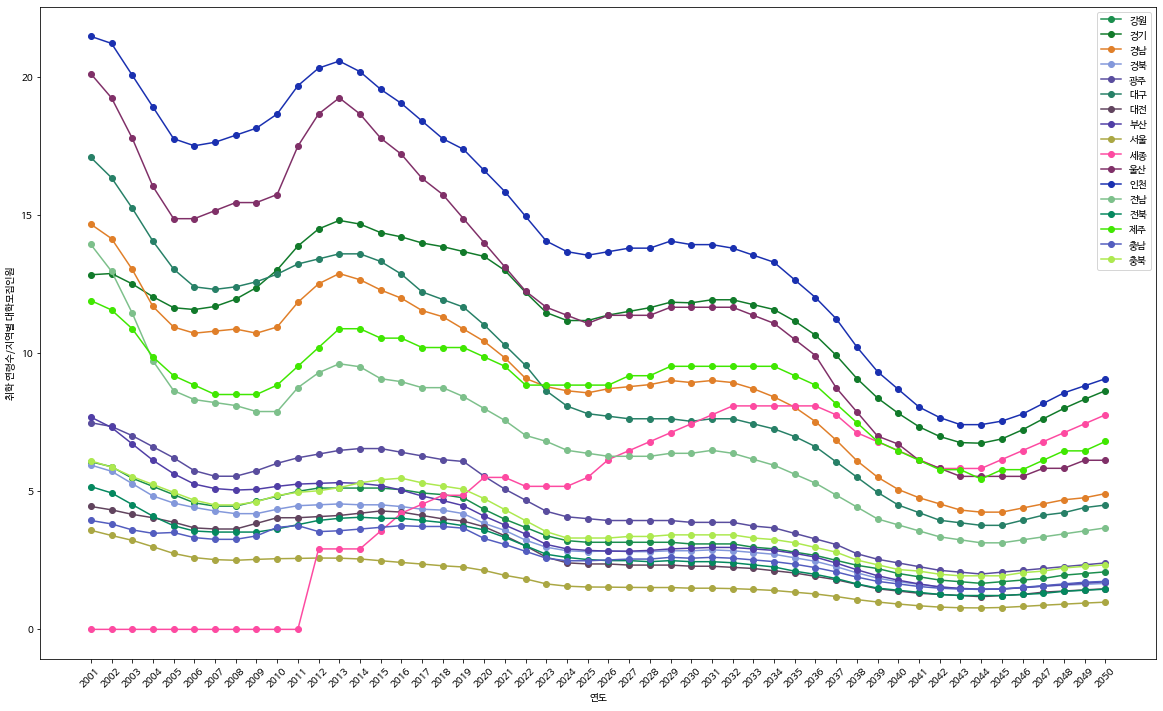

In [50]:
fig = plt.figure(figsize=(20,12))
ax1=fig.add_subplot(111)
i= 0
for char in dfc: 
    ax1.plot(dfmcdf.transpose().squeeze(),dfmcs[dfmcs.index==char].squeeze(),label=char,marker='o',color=cols[i])
    i=i+1
plt.legend()
ax1.set_xlabel("연도")
ax1.set_ylabel("취학 연령수/지역별 대학모집인원")
plt.xticks(rotation=45)

plt.show()